In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape, y_train.shape)

11501568/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)


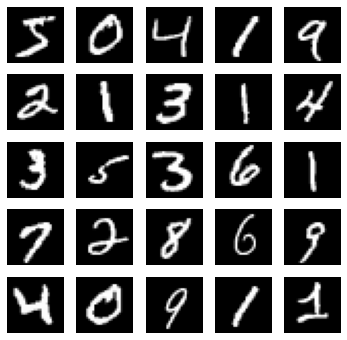

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.axis('off')

plt.show()

In [4]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2008 - accuracy: 0.9415
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0800 - accuracy: 0.9756
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0521 - accuracy: 0.9835
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0366 - accuracy: 0.9883
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.9782
테스트 정확도: 0.9782000184059143


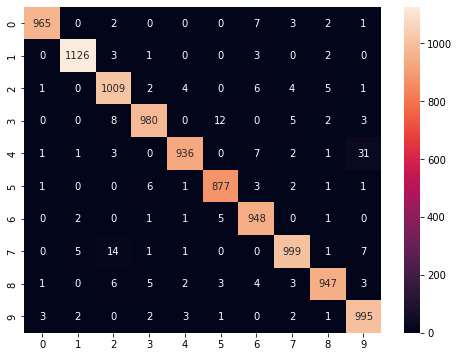

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

plt.figure(figsize=(8,6))

p = model.predict(x_test)
c = confusion_matrix(y_test, np.argmax(p, axis=1))

sns.heatmap(c, annot=True, fmt='d')
plt.show()

In [6]:
print(c)
print('\n')

for i in range(10):
  print(('%d\t (%d/%d)\taccuracy = %.3f') % (i, np.max(c[i]), np.sum(c[i]), np.max(c[i])/np.sum(c[i])))

[[ 965    0    2    0    0    0    7    3    2    1]
 [   0 1126    3    1    0    0    3    0    2    0]
 [   1    0 1009    2    4    0    6    4    5    1]
 [   0    0    8  980    0   12    0    5    2    3]
 [   1    1    3    0  936    0    7    2    1   31]
 [   1    0    0    6    1  877    3    2    1    1]
 [   0    2    0    1    1    5  948    0    1    0]
 [   0    5   14    1    1    0    0  999    1    7]
 [   1    0    6    5    2    3    4    3  947    3]
 [   3    2    0    2    3    1    0    2    1  995]]


0	 (965/980)	accuracy = 0.985
1	 (1126/1135)	accuracy = 0.992
2	 (1009/1032)	accuracy = 0.978
3	 (980/1010)	accuracy = 0.970
4	 (936/982)	accuracy = 0.953
5	 (877/892)	accuracy = 0.983
6	 (948/958)	accuracy = 0.990
7	 (999/1028)	accuracy = 0.972
8	 (947/974)	accuracy = 0.972
9	 (995/1009)	accuracy = 0.986
